In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract
import re

from pytesseract import Output

In [ ]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
! git clone https://github.com/rasyiddin28/ModelML.git

fatal: destination path 'ModelML' already exists and is not an empty directory.


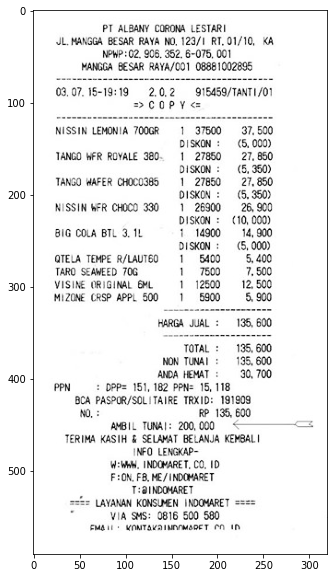

In [ ]:
file_name = "/content/ModelML/Dataset/Receipt Images/struk_31.jpg"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)

In [ ]:
pip install --ignore-installed Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


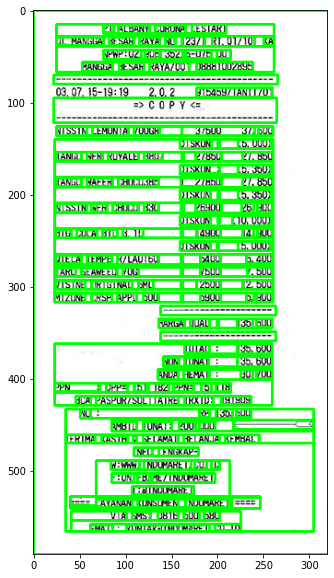

In [ ]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

In [ ]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

PT ALBANY CORONA LESTARI
LLMANGGA BESAR RAVA NO, 129/1 RT,01/10, KA
NPWP:02, 908, 362, 6-076, 001
MANGGA BESAR RAYA/001 08881002805

 

915459/TANTI/O1

 

NISSIN LEMONIA 700GR 19780097, 500

DISKON : (6,000)
TANGO WER ROYALE 980. 1 27850 27,860
DISKON: (8,350)
TANGO WAFER cHOCOG8S 127850 27,850
DISKON : (6,350)
NISSIN WER CHOCO 380 1 26900 26, 900
DISKON = (10,000),
BIG COLA BTL 3.1L + 14900 14, 900,
DISKON : (6,000)
GTELA TEMPE R/LAUTEO 1 6400 5,400
TARO SEAWEED 706 1 7600 7,800
VISINE ORIGINAL GML 1 12600 12,500
MIZONE CRSP APPL 500 1 5900 5, 900

 

HARGA JUAL : 135, 600,

 

TOTAL : 135,600,
NON TUNAI : 135,600
NDA HEMAT +90, 700
PN: DPP= 151, 182 PPNE 15, 118
BOA PASPOR/SOLITAIRE TRXID: 191909

Na, RP 136, 600
AMBIL TUNAI: 200, 0000 <<
TERIMA KASIH & SELAMAT BELANJA KEMBAL

INFO. LENGKAP-

(We¥iW, INDOMARET, CO, 1D
FON, FB, ME/INDOMARET
T:@INDOMARET
LLAYANAN KONSLMEN. INOOMARET

“yi 98: 0816 600 580
unis wowravaiunrMageT en

   



In [ ]:
def find_amounts(text):
  clean_output = re.sub(r'[^\w\d]', '', text)
  total = re.findall(r'total(\d+)', clean_output, re.IGNORECASE)
  total_in_number = int(total[0])
  return total_in_number

  

In [ ]:
amounts = find_amounts(extracted_text)
amounts

135600